# Аналитика в авиакомпании

Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

<b>Цель:</b> изучить данные, проверитиь их на корректность и проанализирвоать полученную информацию.

## 1. Обзор данных

In [82]:
#Библиотеки

import pandas as pd
import matplotlib.pyplot as plt

In [83]:
#Загрузка данных

data_models = pd.read_csv('/datasets/query_1.csv')
data_flights = pd.read_csv('/datasets/query_3.csv')

In [84]:
display(data_models)
data_models.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [85]:
display(data_flights.head())
display(data_flights.duplicated().sum())
data_flights.info()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Промежуточные выводы**: во фрейме data_models сохранены 8 моделей самолетов и кол-во полетов для каждой модели. Во фрейме data_flights сохранены города (101 город) и среднее кол-во прибывающих рейсов в день.
Типы данных для каждого столбца указанны корректно, пропусков и дубликатов в данных нет. В выборке представлен небольшой объем данных, более глубокий анализ можно проводить на полном датасете (например не на среднем значении полетов, а на общих показателях).

## 2. Исследовательский анализ данных

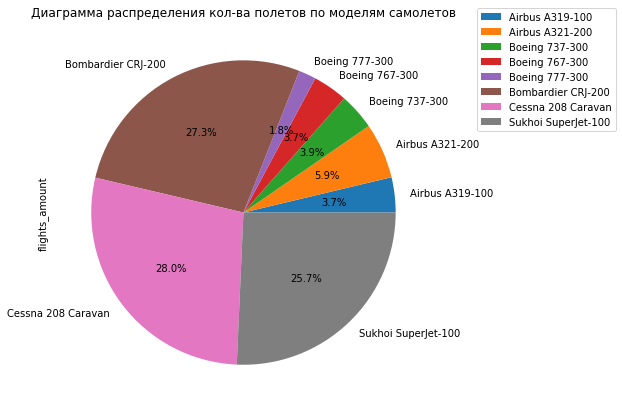

In [86]:
(data_models.pivot_table( index='model',values='flights_amount')
    .plot(kind='pie',subplots=True, autopct='%1.1f%%', figsize=(7,7)))

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Диаграмма распределения кол-ва полетов по моделям самолетов')
plt.show()

**Промежуточные выводы**: лидирующая тройка - Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100, у каждой примерно четверть от общего числа полетов. Остальные модели имеют от 1.8% до 5,9% от общего показателя.

In [87]:
top10_flights = data_flights.sort_values(by='average_flights', ascending=False).head(10)
data_flights['top'] = (
    data_flights['city']
    .where(data_flights['city'].isin(top10_flights['city']), 'Другие'))

top10_flights_group = data_flights.pivot_table(index='top', values='average_flights', aggfunc='sum')
display(top10_flights_group)

,average_flights
top,
Брянск,10.000000
Другие,304.235681
Екатеринбург,11.322581
Красноярск,11.580645
Москва,129.774194
Новосибирск,17.322581
Пермь,10.129032
Ростов-на-Дону,10.193548
Санкт-Петербург,31.161290


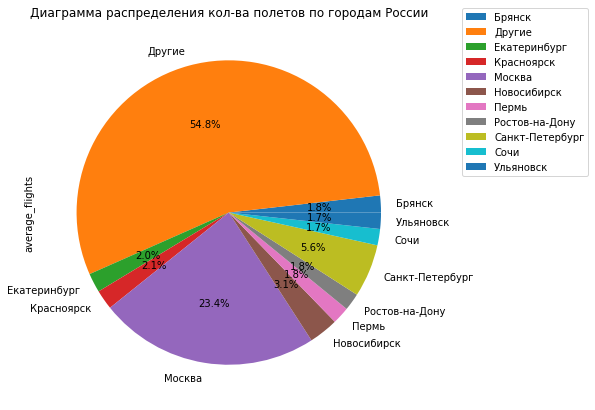

In [88]:
top10_flights_group.plot(kind='pie',subplots=True, autopct='%1.1f%%', figsize=(7,7))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Диаграмма распределения кол-ва полетов по городам России')
plt.show()

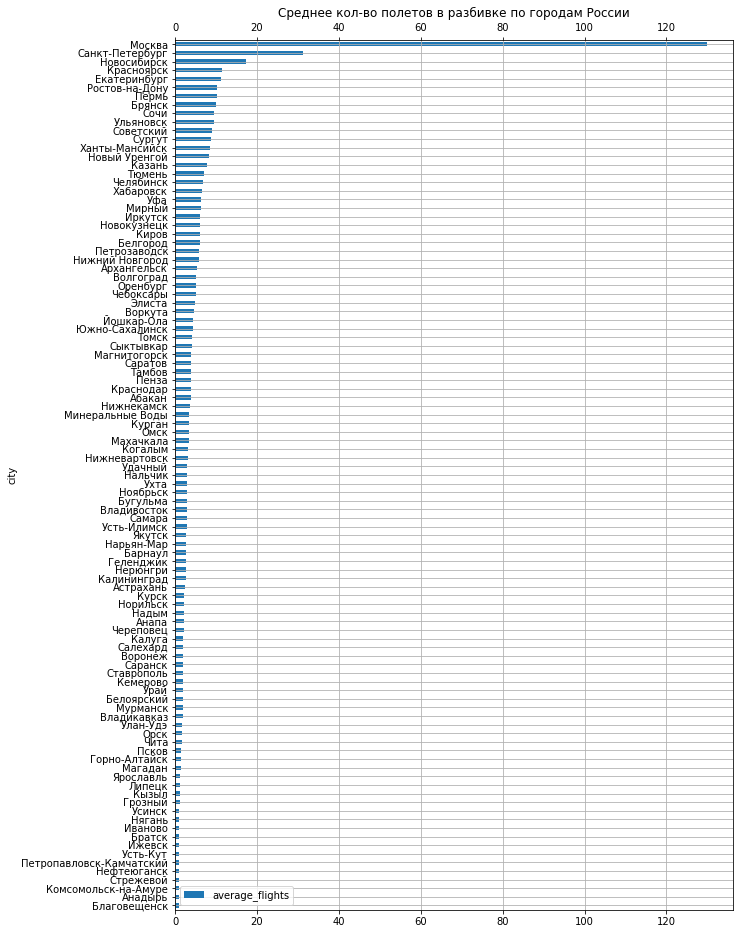

In [89]:
(data_flights.sort_values(by='average_flights')
    .plot(kind='barh',y= 'average_flights',x='city', figsize=(10,16), grid=True))
plt.title('Среднее кол-во полетов в разбивке по городам России')
plt.tick_params(top = True,labeltop = True)
plt.show()

**Промежуточные выводы**: топ10 самых посещаемых городов принимают 45% всех рейсов по России.

In [90]:
display(top10_flights)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


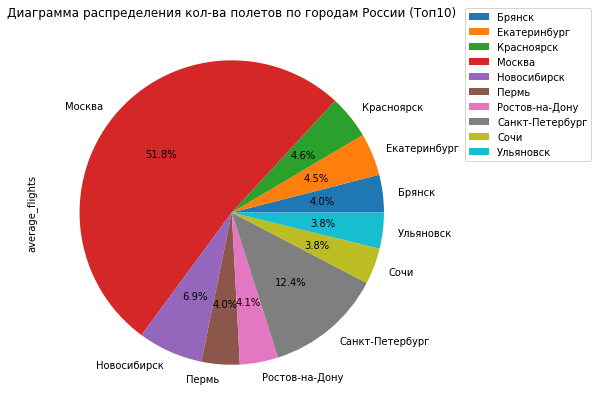

In [91]:
(top10_flights.pivot_table( index='city',values='average_flights')
    .plot(kind='pie',subplots=True, autopct='%1.1f%%', figsize=(7,7)))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Диаграмма распределения кол-ва полетов по городам России (Топ10)')
plt.show()

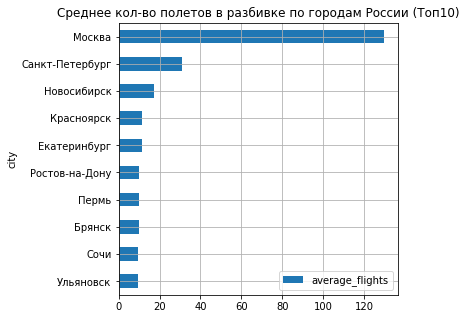

In [92]:
(top10_flights.sort_values(by='average_flights')
    .plot(kind='barh',y= 'average_flights',x='city', figsize=(5,5), grid=True))
plt.title('Среднее кол-во полетов в разбивке по городам России (Топ10)')
plt.show()

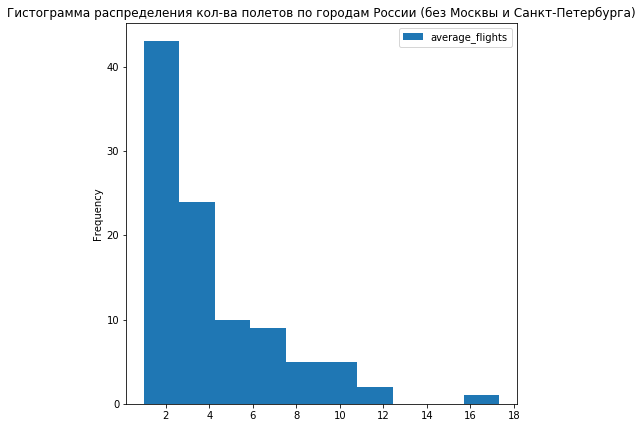

In [93]:
data_flights.query('city!=("Москва","Санкт-Петербург")').plot(kind='hist', figsize=(7,7))
plt.title('Гистограмма распределения кол-ва полетов по городам России (без Москвы и Санкт-Петербурга)')
plt.show()

**Промежуточные выводы**: Москва принимает половину рейсов направляющихся в топ10 самых посещаемых городов России. На втором месте Санкт-Петербург с 12.4%, остальные города имеют от 3.8% до 6.9%.
График распределения кол-ва полетов по городам (без Москвы и Санкт-Петербурга - данные были исключены для наглядности результатов) похож на нормальное график нормального распределения.

## 3. Общий вывод

В рамках ислледования были рассотренные даные о полетах рейсов компании "F9" на территории России за август-сентябрь 2018 года.

Обзор данных показал, что в разрезе сентября 2018 года основную часть перевозок (около 80%) осуществляют 3 модели самолетов (Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100).

На август 2018 года самыми посещаемыми городами России были Москва (23.4% от общего числа полетов) и Санкт-Петербург(5,6%).
Так же, в целом, топ10 самых посещаемых городов России принимают почти половину (45.2%) всех внутренних рейсов.

Необходимо проверить взаимосвязь кол-ва полетов с крупнейшими фестивалями, проводимыми в России.<br><br>